<a href="https://colab.research.google.com/github/Cycyplay/M2_DeepLearning_Classification/blob/main/Deep_Learning_Projet_Classification_Version_R%C3%A9seau_Existant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet M2 Deep Learning Classification 
## Version Réseau Préentrainé


J'ai décidé d'utiliser un réseau convnet entrainé sur la base d'image ImageNet,
base qui represente de nombreuses catégories, d'objets du quotidien aux animaux etc.

**L'idée : classer les différents courants artistiques par la présence de différents objets dans les oeuvres**


# Test d'un réseau existant ImageNet pour la classification d'objet présent sur les oeuvres

In [87]:
import keras
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline 

from google.colab import drive
drive.mount('/content/drive')


x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16

In [91]:
image = cv2.resize(x_test[1000], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

model = VGG16(weights="imagenet")
preds = model.predict(image)

1/1 [==============================] - 1s 738ms/step


1. matchstick: 7.62%
2. nematode: 4.76%
3. lighter: 3.07%
4. digital_clock: 2.93%
5. spotlight: 2.38%


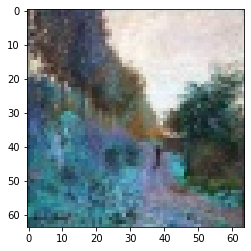

In [92]:
P = decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
 
plt.imshow(x_test[1000], interpolation='nearest')
plt.show()